In [3]:
import gymnasium as gym
import pickle
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from helper_functions import reward_print
device = torch.device(
    "cuda" if torch.cuda.is_available() else
    "cpu"
)
print(device)
CUDA_LAUNCH_BLOCKING=1

cuda


In [19]:
# AC2 algorithm 
class A2C:
    def __init__(self, env):
        self.actor = Actor(env)
        self.critic = Critic(self.actor.env.observation_space.shape[0])
    
    # Main training loop
    def train(self, episodes, gamma, greedy=False):
        total_reward = [0] * episodes
        for i in range(episodes):
            step = rewards = 0
            done = False     
            state, info = self.actor.env.reset()
            state = torch.tensor(state, dtype=torch.float32)
            while not done:
                # Actor makes decision 
                # Environment returns state and reward
                next_state, reward, done, action = self.actor.act(state, greedy)
                next_state = torch.tensor(next_state, dtype=torch.float32)#.todevice
                # Critic evaluates action 
                adv = self.critic.evaluate(state, next_state, reward, gamma)
                # Pass that value to the Actor
                self.actor.evaluation(action, adv, state)
                #action_list += action
                state = next_state
                step += 1
                rewards += reward
                
                # Before it is done
                if done:
                    reward = -300
                    next_state = None
                    adv = self.critic.evaluate(state, next_state, reward, gamma ** step)
                    self.actor.evaluation(action, adv, state)
                
            total_reward[i] = rewards
            print("Episode:", i, " Reward", rewards)
            #print(action_list)
        self.actor.env.close()
        return total_reward

               
    def save(self, filename):
        with open("pickles/" + filename + "actor.pickle", 'wb') as file:
            pickle.dump(self.actor.policy_net1.state_dict(), file)
            
        with open("pickles/" + filename + "actor.pickle", 'wb') as file:
            pickle.dump(self.actor.policy_net2.state_dict(), file)
            
        with open("pickles/" + filename + "actor.pickle", 'wb') as file:
            pickle.dump(self.actor.policy_net3.state_dict(), file)
            
        with open("pickles/" + filename + "actor.pickle", 'wb') as file:
            pickle.dump(self.actor.policy_net4.state_dict(), file)
            
        with open("pickles/" + filename + "actor.pickle", 'wb') as file:
            pickle.dump(self.actor.policy_net5.state_dict(), file)
            
        with open("pickles/" + filename + "actor.pickle", 'wb') as file:
            pickle.dump(self.actor.policy_net6.state_dict(), file)
            
        with open("pickles/" + filename + "actor.pickle", 'wb') as file:
            pickle.dump(self.actor.policy_net7.state_dict(), file)
            
        with open("pickles/" + filename + "actor.pickle", 'wb') as file:
            pickle.dump(self.actor.policy_net8.state_dict(), file)           
            
        with open("pickles/" + filename + "critic.pickle", 'wb') as file:
            pickle.dump(self.critic.policy_net.state_dict(), file)

        

In [15]:
# Actor thread
class ActorNet(nn.Module):  
    def __init__(self, obs, act):
        super(ActorNet, self).__init__()
        self.layer1 = nn.Linear(obs, 128)
        self.layer2 = nn.Linear(128, act)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.softmax(self.layer2(x), dim=-1)
        return x
        

class Actor:
    def __init__(self, env):
        self.env_type = env
        self.env = gym.make(env)
        self.policy_net1 = ActorNet(self.env.observation_space.shape[0], self.env.action_space.shape[0])
        self.optimizer1 = optim.AdamW(self.policy_net1.parameters(), amsgrad=True, lr=.001)
        
        self.policy_net2 = ActorNet(self.env.observation_space.shape[0], self.env.action_space.shape[0])
        self.optimizer2 = optim.AdamW(self.policy_net2.parameters(), amsgrad=True, lr=.001)
        
        self.policy_net3 = ActorNet(self.env.observation_space.shape[0], self.env.action_space.shape[0])
        self.optimizer3 = optim.AdamW(self.policy_net3.parameters(), amsgrad=True, lr=.001)
        
        self.policy_net4 = ActorNet(self.env.observation_space.shape[0], self.env.action_space.shape[0])
        self.optimizer4 = optim.AdamW(self.policy_net4.parameters(), amsgrad=True, lr=.001)
        
        self.policy_net5 = ActorNet(self.env.observation_space.shape[0], self.env.action_space.shape[0])
        self.optimizer5 = optim.AdamW(self.policy_net5.parameters(), amsgrad=True, lr=.001)
        
        self.policy_net6 = ActorNet(self.env.observation_space.shape[0], self.env.action_space.shape[0])
        self.optimizer6 = optim.AdamW(self.policy_net6.parameters(), amsgrad=True, lr=.001)
        
        self.policy_net7 = ActorNet(self.env.observation_space.shape[0], self.env.action_space.shape[0])
        self.optimizer7 = optim.AdamW(self.policy_net7.parameters(), amsgrad=True, lr=.001)
        
        self.policy_net8 = ActorNet(self.env.observation_space.shape[0], self.env.action_space.shape[0])
        self.optimizer8 = optim.AdamW(self.policy_net8.parameters(), amsgrad=True, lr=.001)

    
    def act(self, state, greedy):
        # Get the weights from the policy net
        weights1 = self.policy_net1(state)
        weights2 = self.policy_net2(state)
        weights3 = self.policy_net3(state)
        weights4 = self.policy_net4(state)
        weights5 = self.policy_net5(state)
        weights6 = self.policy_net6(state)
        weights7 = self.policy_net7(state)
        weights8 = self.policy_net8(state)
        # if greedy get max-arg 
        if greedy: 
            action1 = torch.argmax(weights1)
            action2 = torch.argmax(weights2)
            action3 = torch.argmax(weights3)
            action4 = torch.argmax(weights4)
            action5 = torch.argmax(weights5)
            action6 = torch.argmax(weights6)
            action7 = torch.argmax(weights7)
            action8 = torch.argmax(weights8)
        # Use multinomial to select probability / action
        else:
            action1 = torch.multinomial(weights1, 1)
            action2 = torch.multinomial(weights2, 1)
            action3 = torch.multinomial(weights3, 1)
            action4 = torch.multinomial(weights4, 1)
            action5 = torch.multinomial(weights5, 1)
            action6 = torch.multinomial(weights6, 1)
            action7 = torch.multinomial(weights7, 1)
            action8 = torch.multinomial(weights8, 1)

        # Run and return the action 
        actions = [action1.item(), action2.item(), action3.item(), action4.item(), action5.item(), action6.item(), action7.item(), action8.item()]
        state, reward, terminated, truncated, _ = self.env.step(actions)
        return state, reward, terminated or truncated, actions

    
    def evaluation(self, action, advantage, state):
        # Get the weights from the policy 
        weights1 = self.policy_net1(state)
        weights2 = self.policy_net2(state)
        weights3 = self.policy_net3(state)
        weights4 = self.policy_net4(state)
        weights5 = self.policy_net5(state)
        weights6 = self.policy_net6(state)
        weights7 = self.policy_net7(state)
        weights8 = self.policy_net8(state)

        # Calculate the log probability with the weights of the 
        # current state and action and then use the adv to get the loss 
        
        prob1 = torch.distributions.Categorical(weights1).log_prob(torch.tensor(action[0]))  
        loss1 = -1 * prob1 * advantage.detach()
        # Backpropagation
        self.optimizer1.zero_grad()
        loss1.backward()
        self.optimizer1.step()
        
        prob2 = torch.distributions.Categorical(weights2).log_prob(torch.tensor(action[1]))  
        loss2 = -1 * prob2 * advantage.detach()
        # Backpropagation
        self.optimizer2.zero_grad()
        loss2.backward()
        self.optimizer2.step()
        
        prob3 = torch.distributions.Categorical(weights3).log_prob(torch.tensor(action[2]))  
        loss3 = -1 * prob3 * advantage.detach()
        # Backpropagation
        self.optimizer3.zero_grad()
        loss3.backward()
        self.optimizer3.step()
        
        prob4 = torch.distributions.Categorical(weights4).log_prob(torch.tensor(action[3]))  
        loss4 = -1 * prob4 * advantage.detach()
        # Backpropagation
        self.optimizer4.zero_grad()
        loss4.backward()
        self.optimizer4.step()
        
        prob5 = torch.distributions.Categorical(weights5).log_prob(torch.tensor(action[4]))  
        loss5 = -1 * prob5 * advantage.detach()
        # Backpropagation
        self.optimizer5.zero_grad()
        loss5.backward()
        self.optimizer5.step()
        
        prob6 = torch.distributions.Categorical(weights6).log_prob(torch.tensor(action[5]))  
        loss6 = -1 * prob6 * advantage.detach()
        # Backpropagation
        self.optimizer6.zero_grad()
        loss6.backward()
        self.optimizer6.step()
        
        prob7 = torch.distributions.Categorical(weights7).log_prob(torch.tensor(action[6]))  
        loss7 = -1 * prob7 * advantage.detach()
        # Backpropagation
        self.optimizer7.zero_grad()
        loss7.backward()
        self.optimizer7.step()
        
        prob8 = torch.distributions.Categorical(weights8).log_prob(torch.tensor(action[7]))  
        loss8 = -1 * prob8 * advantage.detach()
        # Backpropagation
        self.optimizer8.zero_grad()
        loss8.backward()
        self.optimizer8.step()
    
    def change_render(self, render):
        if render:
            self.env = gym.make(self.env_type, render_mode="human", max_episode_steps=200)
        else: 
            self.env = gym.make(self.env_type, max_episode_steps=200)

In [14]:
# Critic thread
class CriticNet(nn.Module):  
    def __init__(self, obs):
        super(CriticNet, self).__init__()
        self.layer1 = nn.Linear(obs, 128)
        self.layer2 = nn.Linear(128, 1)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        return  self.layer2(x)


class Critic:
    def __init__(self, obs):
        
        self.policy_net = CriticNet(obs)
        self.optimizer = optim.AdamW(self.policy_net.parameters(),amsgrad=True, lr=.001)
    
    
    def evaluate(self, state, next_state, reward, gamma):
        # Get Qvalue and next Qvalue from policy     
        Qvalue = self.policy_net(state)
        if next_state is not None:
            next_Qvalue = self.policy_net(next_state)
        else: 
            next_Qvalue = 0
        
        # Calculate the TD and advantage for the next action
        TD = reward + (gamma * next_Qvalue)
        # print(next_Qvalue)
        adv = TD - Qvalue
        TD = torch.tensor([TD])
        loss_function = nn.MSELoss()
        loss = loss_function(Qvalue, TD)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        return adv

Episode: 0  Reward -12980.061487165465
Episode: 1  Reward -9561.365754473018
Episode: 2  Reward -6554.448793251369
Episode: 3  Reward -4170.360637240191
Episode: 4  Reward -3045.311040586135
Episode: 5  Reward -2506.056977847366
Episode: 6  Reward -2558.510341978774
Episode: 7  Reward -2488.825860971649
Episode: 8  Reward -1814.5971815677126
Episode: 9  Reward -1761.48441800302
Episode: 10  Reward -1377.8461071492115
Episode: 11  Reward -1423.8908282497284
Episode: 12  Reward -1597.2379555714228
Episode: 13  Reward -1723.2860873191557
Episode: 14  Reward -1754.3252205878227
Episode: 15  Reward -1364.2084802613904
Episode: 16  Reward -1336.7360603020581
Episode: 17  Reward -1229.099420357208
Episode: 18  Reward -1232.5495864904062
Episode: 19  Reward -1169.973450928155
Episode: 20  Reward -1180.74432560318
Episode: 21  Reward -1261.5977411107426
Episode: 22  Reward -1176.228285655373
Episode: 23  Reward -1226.1503809995136
Episode: 24  Reward -1479.5227567678025
Episode: 25  Reward -138

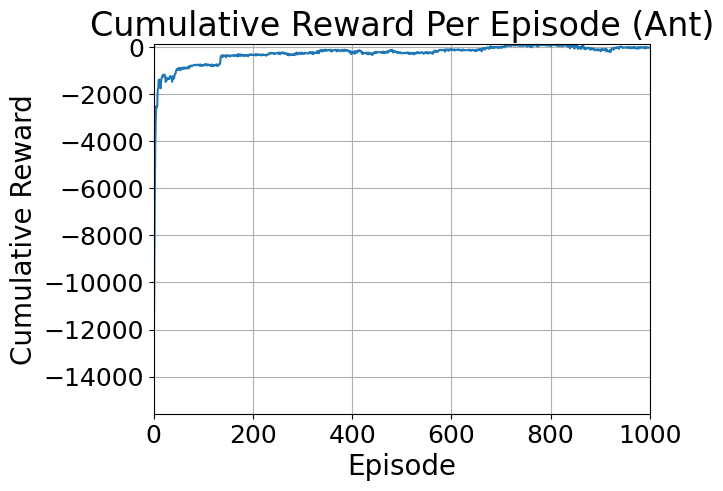

Episode: 0  Reward -3.7222492833186043
Episode: 1  Reward -0.7764063363434154
Episode: 2  Reward -0.3466653639306764
Episode: 3  Reward 2.4990426945225495
Episode: 4  Reward 0.5433759131833289
Episode: 5  Reward -1.4601846705086903
Episode: 6  Reward -3.7792557959349997
Episode: 7  Reward 0.9611404259409706
Episode: 8  Reward -0.6433456796227003
Episode: 9  Reward -0.777887663140713
Episode: 10  Reward 2.3616728727462704


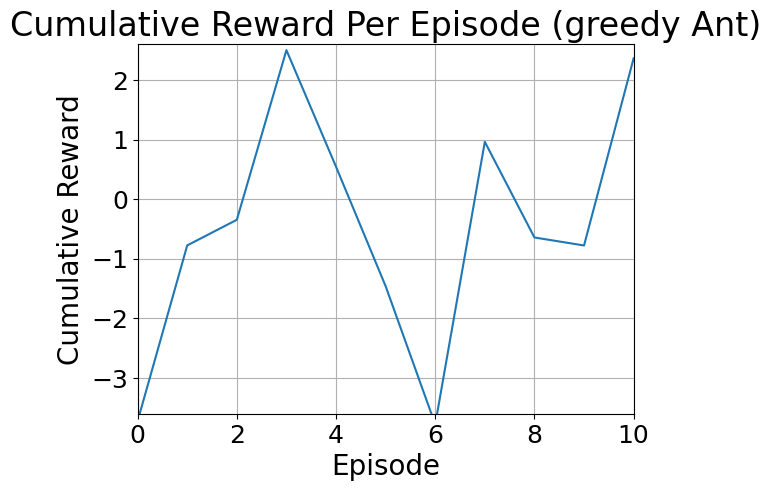

In [22]:
# AC2 Agent for Cart Pole
environment = "Ant-v5"
agent = A2C(environment)

episodes = 1000
gamma = .99

agent.actor.change_render(False)
# Main training session
total_rewards = agent.train(episodes, gamma)
print("Best reward: ", max(total_rewards))
reward_print(total_rewards, episodes, "Ant")

# Greedy run 
agent.actor.change_render(False)
total_greedy_rewards = agent.train(11, gamma, greedy=True)
reward_print(total_greedy_rewards, 10, "greedy Ant")

Average -288.1167064918276


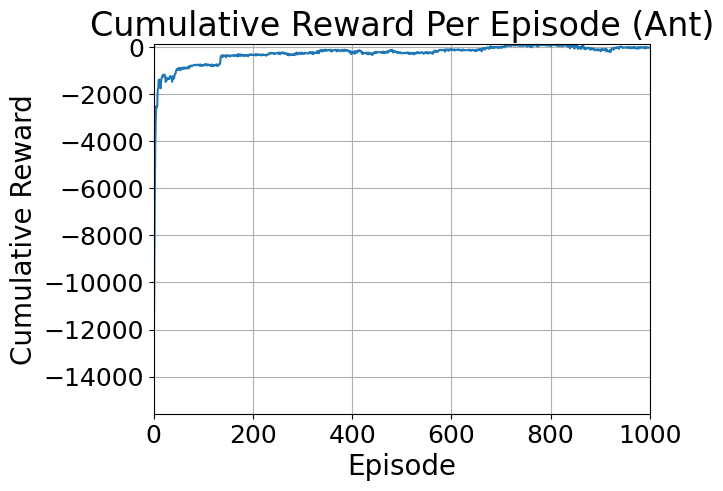

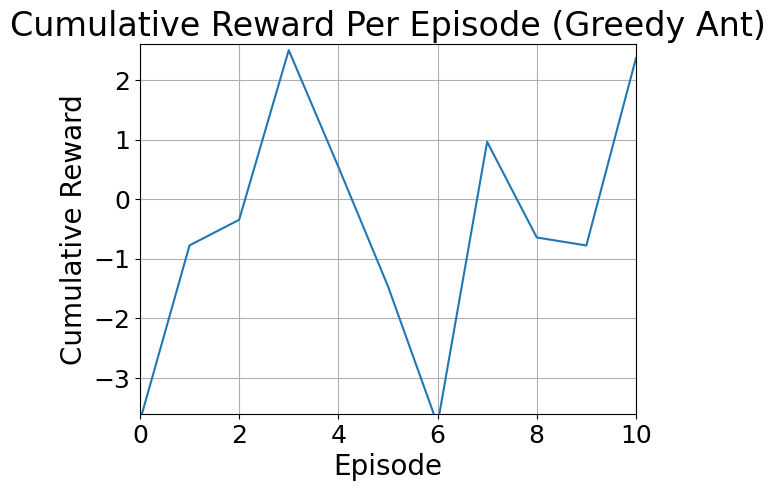

In [23]:
# Prints the final graph and saves final weights

print("Average", sum(total_rewards)/ len(total_rewards))
reward_print(total_rewards, episodes, "Ant")
reward_print(total_greedy_rewards, 10, "Greedy Ant")
agent.save("drpreisl_BipedalWalker")